# Decision Tree Classifier 

in this part we will use simple decision tree model to predict the repeating and non repeating frbs

In [1]:
# importing the  necessary libraries 
import pandas as pd 
import numpy as np

In [2]:
# reading the csv file
df = pd.read_csv("../../datasets/cul_cat1.csv")
df.head()

,Unnamed: 0,tns_name,previous_name,repeater_name,ra,dec,gb,bonsai_dm,low_ft_68,up_ft_68,...,fre_width,fre_width_ob,rest_width,energy,bright_temp,log_fre_width,log_redshift,log_rest_width,log_energy,log_bright_temp
0,0,FRB20180725A,180725.J0613+67,-9999,93.42,67.07,21.29,716.6,0.0,2.7,...,450.875425,274.8,0.180406,2.970091e+40,5.792865e+29,2.654057,-0.193318,-3.743748,40.472770,29.762893
1,1,FRB20180727A,180727.J1311+26,-9999,197.72,26.42,85.60,642.1,0.0,1.9,...,645.927163,400.0,0.860778,1.249365e+40,2.754578e+29,2.810184,-0.211253,-3.065109,40.096689,29.440055
2,2,FRB20180729A,180729.J1316+55,-9999,199.40,55.58,61.16,108.4,0.0,4.6,...,293.157605,292.5,0.099776,1.124159e+36,5.089481e+26,2.467101,-2.648161,-4.000975,36.050828,26.706673
3,3,FRB20180729B,180729.J0558+56,-9999,89.93,56.50,15.68,318.6,0.0,0.9,...,414.871625,358.4,0.271259,5.215744e+38,3.325295e+28,2.617914,-0.802538,-3.566616,38.717316,28.521830
4,4,FRB20180730A,180730.J0353+87,-9999,57.39,87.19,25.11,849.2,3.3,2.3,...,647.063272,359.0,0.259653,2.452905e+41,1.583900e+30,2.810947,-0.095607,-3.585606,41.389681,30.199728


In [4]:
# splitting the data into training and testing sets 

from sklearn.model_selection import train_test_split
x = df[['log_bright_temp','log_fre_width']]
y = df[['repeating']]
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [5]:
# checking the ratio of the split 

train_ratio = y_train.sum() / len(y_train)
test_ratio = y_test.sum() / len(y_test)

print("Training set ratio:", train_ratio)
print("Testing set ratio:", test_ratio)

Training set ratio: repeating    0.159036
dtype: float64
Testing set ratio: repeating    0.156425
dtype: float64


In [6]:
print(len(X_train) , len(X_test))

415 179


In [7]:
# we standardize the input features by removing the mean and scaling the variance
# to unity. 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform((X_train))

X_test = scaler.transform(X_test) #subsequently appling to the testing data

In [8]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train,y_train = smt.fit_resample(X_train,y_train)

print(y_train.sum())

repeating    349
dtype: int64


In [9]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion = 'gini' , splitter = 'best' , max_depth=3, min_samples_split = 2, min_samples_leaf = 1 , min_weight_fraction_leaf =0.0, max_features = None , max_leaf_nodes =None , min_impurity_decrease = 0.0 , class_weight = None , ccp_alpha = 0.0)
model1.fit(X_train , y_train )

DecisionTreeClassifier(max_depth=3)

In [10]:
y_pred = model1.predict(X_test)

In [11]:
# calculating the f2 score for this model 

from sklearn.metrics import fbeta_score
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')

print(f"F2 Score: {f2:.4f}")

F2 Score: 0.8119


In [12]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)

In [13]:
# Normalize confusion matrix values to percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

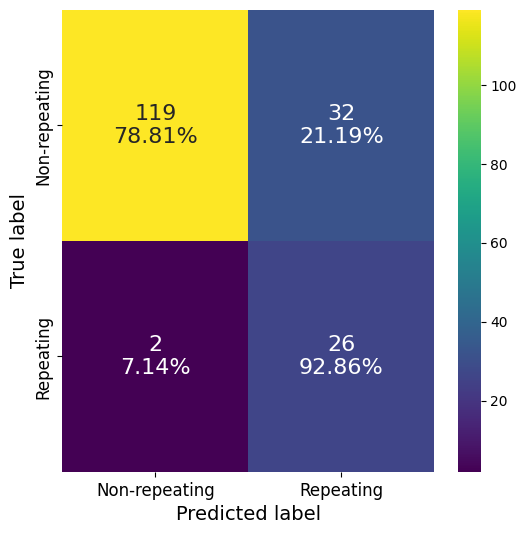

In [14]:
import seaborn as sns

labels = np.array([["{0}\n{1:.2f}%".format(value, percent) for value, percent in zip(row, percent_row)] 
                   for row, percent_row in zip(cm, cm_percent)])
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap='viridis', cbar=True, annot_kws={"size": 16})

# Adding labels and title
plt.xlabel("Predicted label", fontsize=14)
plt.ylabel("True label", fontsize=14)

# Customize tick labels
plt.xticks([0.5, 1.5], ["Non-repeating", "Repeating"], fontsize=12)
plt.yticks([0.5, 1.5], ["Non-repeating", "Repeating"], fontsize=12)

# Show the plot
plt.show()